# Quantile, expectile and m-Huberized regression

As as Data Sciencie practioner, you may be familiar with a notion of so-called **quantile regression**. It's one of the most common methods used to estimate some specfic properties of the target variable distribution.

If such things as "target variable distribution" sounds strange to you ears, please read the brief and intuitive recap on that topic I've placed below.

## Problem formulation - an (over)simplified version

Let's assume we're solving a regression problem which is to predict the price of an real estate (a house or an apartment) based on its size.

In [11]:
import pandas as pd

data = pd.DataFrame({
    'sq_meters': [80, 80, 80, 80, 80, 
                  100, 100, 100, 100, 100],
    'price': [520000, 3093160, 890000, 199000, 430000,
              670000, 925000, 330000, 4999999, 700000]
})

The `DataFrame` above contains a set of real price-size pairs picked from the Polish real estate annoucement website [Otodom](otodom.pl). I've intentionally selected observations that vary a lot from each other.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

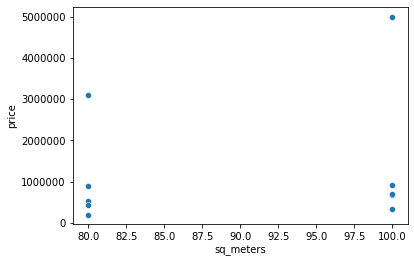

In [15]:
sns.scatterplot(data=data, x='sq_meters', y='price')
plt.show()

Now, let's answer the question - what should be the price of a real estate when its area equals 80 square meters?
*Hey, we have not enough data to conclude'*, you may say. We cannot estimate an accurate price based only on that one particular feature - area. We'd also like to know where the given reals estate actually is located (exact city/town), number of the rooms, the condition of the object etc. You are totally right, but bear in mind we'll never have all the information to get rid of all the incertainty when calculating a prediction. So please consider this exercise as thought experiment.

The first answer you'll probably come up with is to use an average for the each group. In such an approach, it can be easily calculated using pandas groupby methods.

In [17]:
data.groupby('sq_meters').mean()

,price
sq_meters,
80,1026432.0
100,1524999.8


Let's do the same using LinearRegression model from scikit-learn.

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data[['sq_meters']], data[['price']])
print(f"80: {reg.predict([[80]])}")
print(f"100: {reg.predict([[100]])}")

80: [[1026432.]]
100: [[1524999.8]]


/home/krzysztof/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/krzysztof/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can see it gave us exactly the same results as calculating group-wise means. This is a special case, because we only have two area-related groups: 80 and 100 meters. If we have more, the values estimated with the LinearRegression would be not necessary identical.

The goal of doing this exercise was basically to show you, what answer we're looking for when trying to optimize MSE or, equivalently, RMSE. 

In [ ]:
# https://datascience.stackexchange.com/questions/66712/reason-for-generally-using-rmse-instead-of-mse-in-linear-regression

http://www.sp.unipg.it/surwey/images/workshop/nikos/Session-1_Pisa_July-2016.pdf